In [18]:
import vizLib
import glob
import pylab
import qMS
import numpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [24]:
path = '/home/jhdavis/ed/data/l17PL/fixedSubPL/plots_to_plot/'
files = qMS.sort_nicely(glob.glob(path+'*.txt'))
files.reverse()

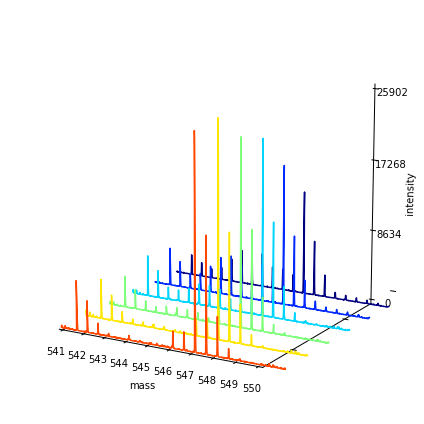

In [34]:
plotMSSpectra3D(files, xMin=541, xMax=550, figsize=(6,6), legend=False, yScale=0.4)

In [ ]:
def plotMSSpectra3D(listOfFilesToPlot, listOfNames=None, listOfColors=None, gridLines=False, yMin=0.5, yMax=2.5, 
                    yScale = 1.0, legend=True, normalizeToN15=False, subtractRef=None, legendLoc=4, lw=1.5, 
                    xMin=0, xMax=2000, scaleP=False, scaleI=0, scaleVal=1.0, figsize=(10,10), 
                    tLeft=0, tRight=-1, fixedOffset=False, noTicks=False, xlabel='mass', zlabel='intensity', a14=1.0):
    """plotMSSpectra3D is a  makes a 3d plot of MS spectra

    :param listOfFilesToPlot: a list of the spectra to be plotted (full paths)
    :type listOfFilesToPlot: list of strings
    :param listOfNames: a list of the names for each dataset
    :type listOfNames: list of strings
    :param listOfColors: a list of colors to be used
    :type listOfColors: list of colors
    :param gridLines: a bool of whether to draw gridlines
    :type gridLines: bool
    :param yMin: float of minimum y value
    :type yMin: float
    :param yMax: float of maximum y value
    :type yMax: float
    :param legend: a bool of whether to have a legend
    :type legend: bool
    :param normalizeToN15: a bool of whether to nomrmalize each plot the N15 maximum
    :type normalizeToN15: bool
    :param subtractRef: a int pointing to which is the refernece spectra that should be subtracted from each 
    :type subtractRef: int

    :returns: the plotted axis
    
    """  
    if listOfNames==None:
        listOfNames = listOfFilesToPlot
    if listOfColors==None:
        listOfColors = [pylab.cm.jet(float(i)/float(len(listOfFilesToPlot))) for i in range(len(listOfFilesToPlot))]
    
    fig = pylab.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    yTotal = len(listOfFilesToPlot)
    top = 0.0

    if not (subtractRef is None):
        [bhah, zsRef, blah] = qMS.readMSSpectraFile(listOfFilesToPlot[subtractRef])
        #zsRef = list(numpy.array(zsRef)-fixedOffset
        zNorm = max(zsRef[len(zsRef)/2:])
        zsRef = numpy.array(zsRef)/zNorm
    
    for i,f in enumerate(listOfFilesToPlot):
        [xs, zs, name] = qMS.readMSSpectraFile(f)
        if fixedOffset:
            off = zs[len(zs)/2]
            print off
            #zs = list(numpy.array(zs)-zs[len(zs)/2])
            zs = list(numpy.array(zs)-off)
        ys = [yTotal-i]*len(xs)
        ys = numpy.array(ys)*yScale
        if normalizeToN15:
            zNorm = max(zs[len(zs)/2:])
            zs = numpy.array(zs)/zNorm
        if not (subtractRef is None):
            zNorm = max(zs[len(zs)/2:])
            zs = numpy.array(zs)/zNorm
            zs[:len(zsRef)/2] = zs[:len(zs)/2]-zsRef[:len(zsRef)/2]
            zs = zs*zNorm
            #xs = xs[:len(xs)/2]
            #ys = ys[:len(ys)/2]
            #zs = zs[:len(zs)/2]
        zs[:len(zs)/2] = numpy.array(zs[:len(zs)/2])*a14
        if (scaleP is True) and (i==scaleI):
            zs = numpy.array(zs)*scaleVal
        ax.plot(numpy.array(xs[tLeft:tRight]),numpy.array(ys[tLeft:tRight]),numpy.array(zs[tLeft:tRight]), color=listOfColors[i], lw=lw, label=listOfNames[i])
        top = max([top, float(max(zs))])


    ax.w_xaxis.pane.set_visible(False)
    ax.w_yaxis.pane.set_visible(False)
    ax.w_zaxis.pane.set_visible(False)

    if gridLines:        
        ax.w_xaxis.gridlines.set_linewidth(1)
        ax.w_yaxis.gridlines.set_linewidth(1)
        ax.w_zaxis.gridlines.set_linewidth(1)
    
    else:
        ax.w_xaxis.gridlines.set_visible(False)
        ax.w_yaxis.gridlines.set_visible(False)
        ax.w_zaxis.gridlines.set_visible(False)

    [i.set_linewidth(1) for i in ax.w_xaxis.get_ticklines()]
    [i.set_linewidth(1) for i in ax.w_yaxis.get_ticklines()]
    [i.set_linewidth(1) for i in ax.w_zaxis.get_ticklines()]

    ax.w_xaxis.line.set_linewidth(1)
    ax.w_yaxis.line.set_linewidth(1)
    ax.w_zaxis.line.set_linewidth(1)
               
    ax.set_zticks([round(i,1) for i in [0, top/3, 2*top/3, top]])
    ax.set_zlim3d([0, top])
    ax.set_ylim3d(yMin, yMax)
    ax.set_yticks(range(1,yTotal+1))
    pylab.yticks(range(1,yTotal+1), ['']*yTotal)
    ax.set_xlim3d([xMin, xMax])
    
    if noTicks:
        ax.set_zticks([])
        ax.set_xticks([])
        ax.set_yticks([])

    ax.set_xlabel(xlabel)
    ax.set_zlabel(zlabel)

    ax.view_init(15, -60)
    if legend:
        pylab.legend(loc=legendLoc)
    
    pylab.tight_layout()
    return ax